# Fitness Class EDA

#### Import the dataset and the necessecary Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
df = pd.read_csv('fitness_class_data.csv')
df.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [6]:
df.shape

(1500, 8)

In [7]:
df.dtypes
# "days_before" column needs to be changed to integer instead of object

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [8]:
df.info()
# "weight" column has 20 missing values that need to be replaced with the meann value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [9]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


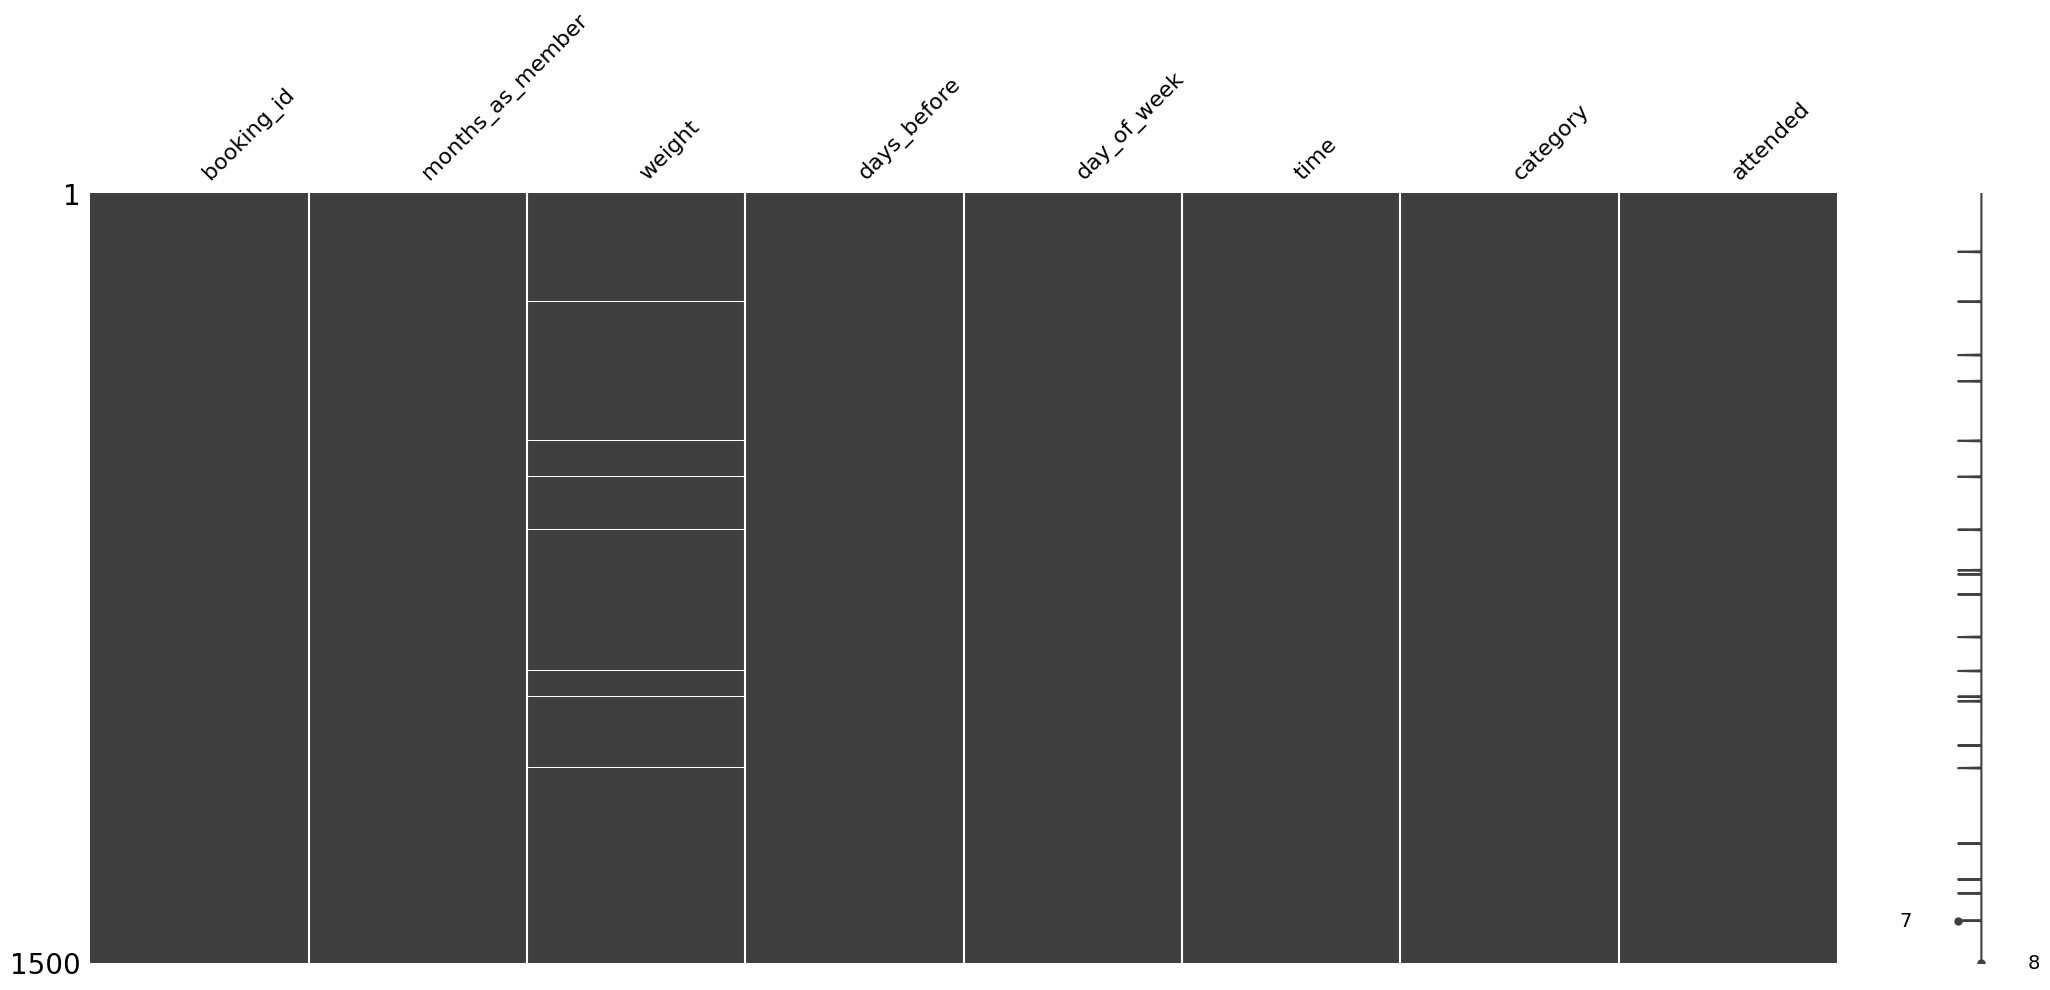

In [10]:
msno.matrix(df)
plt.show()

In [11]:
df.isnull().sum().sort_values()

booking_id           0
months_as_member     0
days_before          0
day_of_week          0
time                 0
category             0
attended             0
weight              20
dtype: int64

In [12]:
df["months_as_member"].unique()
# no missing data no reformating needed

array([ 17,  10,  16,   5,  15,   7,  11,   9,  23,  13,   8,  22,   6,
        33,  24,  14,   2,  12,  26,  28,  27,   1,   3,  21,  18,  19,
        53,  20,  34,  25,  32,  73,  55,   4,  35,  54,  76,  62,  42,
       105,  90,  29,  60,  30, 107,  52,  37,  38,  48,  51,  40,  89,
        57,  36,  44,  39,  41,  47,  58,  66,  45,  43,  61,  50,  65,
        31,  97,  59,  93, 148, 111,  69])

In [13]:
df['category'].unique()
# '-' represents missing data and needs to be replaced with 'unknown'

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [14]:
df['day_of_week'].unique()
# values need to be corrected to fit the described format

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [15]:
df["attended"].value_counts(normalize=True)
# no missing data

0    0.697333
1    0.302667
Name: attended, dtype: float64

In [16]:
df['booking_id'].duplicated().value_counts()
# all values are unique() + no missing data()

False    1500
Name: booking_id, dtype: int64

In [17]:
df['days_before'].unique()
# no missing data
# remove ' days' from the data points that have it

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [18]:
df['time'].value_counts()
# no missing data no reformating needed

AM    1141
PM     359
Name: time, dtype: int64

In [19]:
df['weight'].isnull().sum()
# 20 missing values. min value is 55kgs

20

#### Reshaping and manipulating the data to fit the desired format

In [25]:
df["day_of_week"] = df["day_of_week"].str.replace('Wednesday','Wed')\
                                         .replace('Fri.','Fri')\
                                         .replace('Monday','Mon')
df["category"] = df["category"].str.replace('-', 'unknown')
df[["category", "day_of_week"]]                   

,category,day_of_week
0,Strength,Wed
1,HIIT,Mon
2,Strength,Sun
3,Cycling,Fri
4,HIIT,Thu
...,...,...
1495,HIIT,Fri
1496,Strength,Mon
1497,HIIT,Tue
1498,Aqua,Sun


In [21]:
df["days_before"] = df["days_before"].str.replace(' days', '')
df["days_before"].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '20', '1', '15', '11', '16', '17', '29'], dtype=object)

In [28]:
df["days_before"] = df["days_before"].astype('int')
df["booking_id"] = df["booking_id"].astype('object')
df.dtypes

booking_id           object
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [29]:
df["category"].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'unknown', 'Aqua'],
      dtype=object)

# Answering Questions

##### 1. For every column in the data:

###### A. State whether the values match the description given in the table above.
- "booking_id" : Is a numeric data Type and not nominal.
- "months_as_member" : Yes
- "weight" : contains missing data and the minimum values is 55kgs
- "days_before": it is an object data type and some values are contain the word ' days'.
- "day_of_week": the format isn't consistent. some values contain full name of the day instead of just the first 3 letters.
- "time": Yes
- "category": one extra category called '-' which represents missing data.
- "attended": Yes

##### b. State the number of missing values in the column.
- "weight" contained 20 missings values.
- "category" contained 13 missing values.

##### c. Describe what you did to make values match the description if they did not match.
- "booking_id": Changed data type to object data type
- "days_before": first removed the word 'days' from rows that had them, before changing the data type to numeric.
- "weight": replace missing data with the over all average of the column.
- "category": replaced missing data with 'unknown'
- "day_of_week": normalized values so they all represent the first 3 letters of day name.

##### 2. Create a visualization that shows how many bookings attended the class. Use the visualization to:

##### a. State which category has the most observations.
HIIT category had the most observations, accounting for 667 attendees.

<Axes: title={'center': 'Number of Attendees per Category'}, xlabel='category', ylabel='count'>

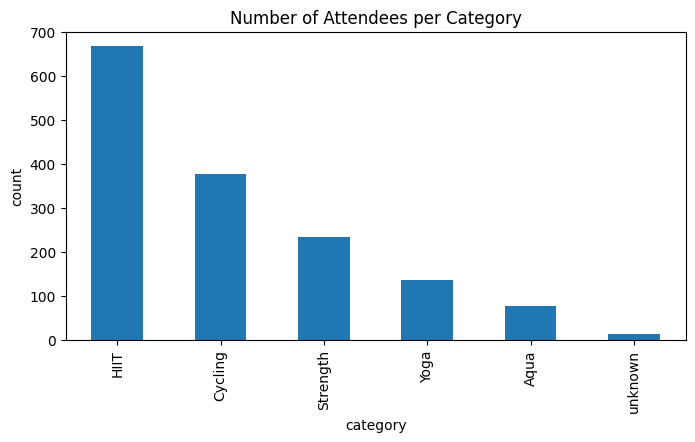

In [30]:
df.groupby('category')['attended'].count().sort_values(ascending=False).plot(kind="bar", figsize=(8, 4), title='Number of Attendees per Category', ylabel='count')

##### b. Explain whether the observations are balanced across categories
- There is a balance across categories except in the 'unknown' category.

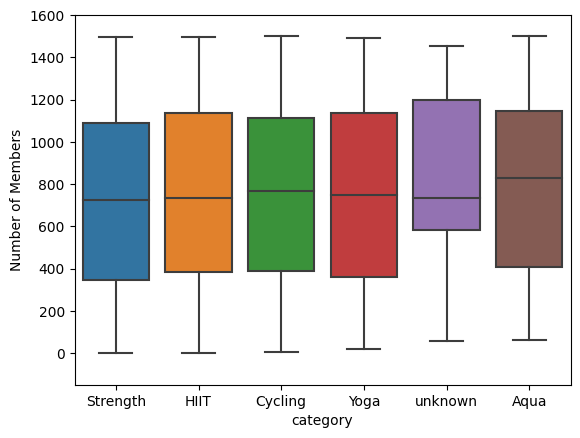

In [31]:
sns.boxplot(x='category', y='booking_id', data=df)
plt.ylim(-150, 1600)
plt.ylabel('Number of Members')
plt.show()

#### 3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.
- The Distribution of the 'months_as_member' column is a normal distribution skewed to the righ.

<ipython-input-35-d2b36910eef3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['months_as_member'])


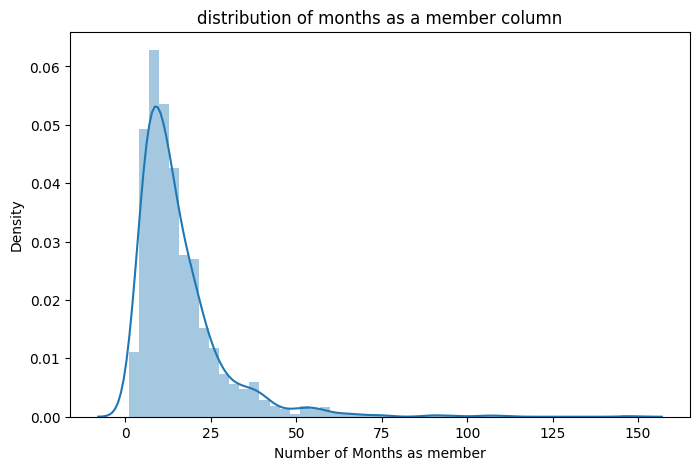

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df['months_as_member'])
plt.xlabel('Number of Months as member')
plt.title('distribution of months as a member column')
plt.show()

##### 4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.
- There is a relationship between "attended" column and "months_as_member" column but it isn't linear. Members who have been members for longer time also tend to consistent with their attendence

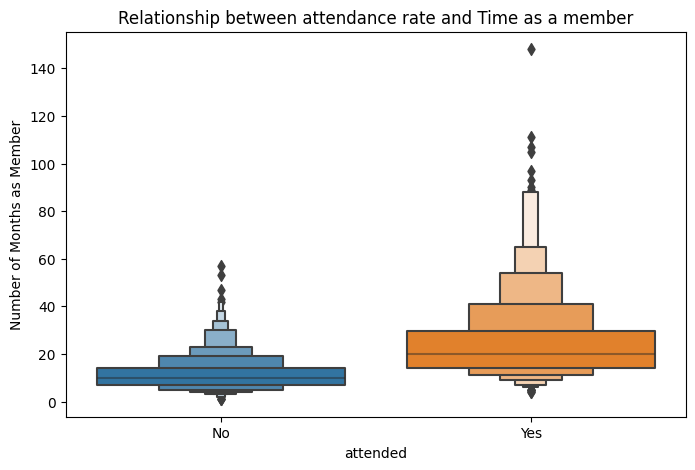

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxenplot(x='attended', y='months_as_member', data=df)
plt.ylabel('Number of Months as Member')
plt.title('Relationship between attendance rate and Time as a member')
fig.set_xticklabels(['No', 'Yes'])
plt.show()

#### 5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).
- This is a Classification machine learning problem.

##### 6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

The base model i chose for this Classification problem is a K-nearest Neighbors.
1. I assigned Features and Taget variable to X and y respectively.
2. I imported necessary libraries.
3. I setup a pipeline with scaler and instantiated K-nearest neighbors model.
4. I usd KFold to find out how well my model can predict the outcome of unseen data.
5. I used GridesearchCV to try out different values and then pick the value that gives the best score.
6. I fitted the model to the training data then made predictions using test data.
7. I extracted the results and the best score. 

In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv('for_training.csv')
# X = features. y = target variable
X = df[["months_as_member", "days_before"]].values
y = df["attended"].values
print(type(X), type(y), X.shape, y.shape)
###########
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
##########
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
kf = KFold(n_splits=6, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
parameters = {"knn__n_neighbors": np.arange(1, 51)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=kf)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_params_),
print(cv.best_score_),
print(cv.score(X_test, y_test))
# Gridsearch gave slightly better results

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1500, 2) (1500,)
{'knn__n_neighbors': 43}
0.7828571428571428
0.7688888888888888


## Task 7: Fit a comparison model to predict whether members will attend using the data provided. You must include your code.
The comparision model i chose is a Logistic Regression model.
1. I assigned Features and Taget variable to X and y respectively.
2. I imported necessary libraries.
3. I setup a pipeline with scaler and instantiated Logistic Regression model.
4. I usd KFold to find out how well my model can predict the outcome of unseen data.
5. I used GridesearchCV to try out different values and then pick the value that gives the best score.
6. I fitted the model to the training data then made predictions using test data.
7. I extracted the results and the best score including area under the cover score.

In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv('for_training.csv')
# X = features. y = target variable
X = df[["months_as_member", "days_before"]].values
y = df["attended"].values
print(type(X), type(y), X.shape, y.shape)
###########
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
##########
steps = [('scaler', StandardScaler()), 
         ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
kf = KFold(n_splits=6, shuffle=True, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
parameters = {"logreg__C": np.linspace(0.001, 1.0, 10)}
cv_reg = GridSearchCV(pipeline, param_grid=parameters, cv=kf)
cv_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = cv_reg.predict(X_test_reg)
y_pred_probs = cv_reg.predict_proba(X_test_reg)[:,1]
print(cv_reg.best_params_),
print(cv_reg.best_score_),
print(print(roc_auc_score(y_test_reg, y_pred_probs)))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1500, 2) (1500,)
{'logreg__C': 0.445}
0.7771428571428571
0.8093035781191458
None


## Task 8: Explain why you chose the two models used in parts 6 and 7.
Logistic Regression and KNN are the most popular and suitible models to use for a binary classification using labeled data, since they consistently yield statisfying results when solving problems similar to our.

## Task 9: Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.
I instantiated both model and fitted the on scaled training data then extracted the score from both.
Logistic regression performed better than KNN classifier.

In [39]:
X = df[["months_as_member", "days_before"]].values
y = df["attended"].values
print(type(X), type(y), X.shape, y.shape)
###############################
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
###############################
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_comp_scaled = scaler.fit_transform(X_train_comp)
X_test_comp_scaled = scaler.transform(X_test_comp)

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_comp, y_train_comp, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Extracting scores from different models and comapring them
for name, model in models.items():
  model.fit(X_train_comp_scaled, y_train)
  test_score = model.score(X_test_comp_scaled, y_test)
  print("{} test set Accuracy: {}".format(name, test_score))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (1500, 2) (1500,)
Logistic Regression test set Accuracy: 0.7888888888888889
KNN test set Accuracy: 0.7377777777777778


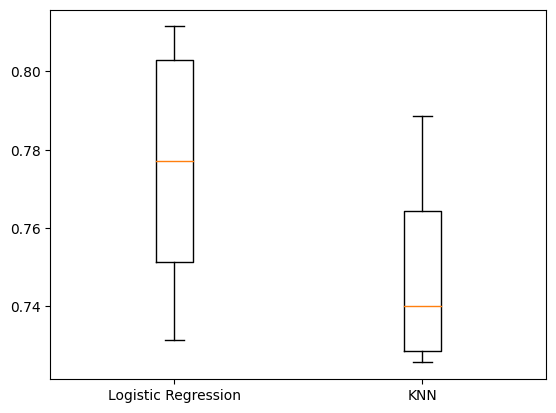

In [40]:
# Create a box plot of the results
import matplotlib.pyplot as plt
plt.boxplot(results, labels=models.keys())
plt.show()

## Task 10: Explain which model performs better and why.
Logistic Regression model performed better than the K-nearest neighbors model, because it score higher on most metrics.

Logistic Regression:
- Accuracy score: 0.78
- Precision score: 0.74
- Recall score: 0.45
K-nearest Neighbors:
- Accuracy score: 0.76
- Precision score: 0.63
- Recall score: 0.55